<a href="https://colab.research.google.com/github/ggpal7117/Stock-Return-Analysis-with-Monte-Carlo-Simulation/blob/main/Stock_Portfolio_Analysis_w_Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will simulate stock returns using a monte carlo simulation for two different stock portfolio.

Scenario: I am a college student who works a part time job and want to invest in a eft(usually a "portfolio" of stocks). Using a monte carlo simulation, we can simulate returns over time for these portfolios to see which will statistically give me the most money by the time I graduate

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import lxml
from datetime import date
from dateutil.relativedelta import relativedelta
import requests
from scipy.stats import shapiro
from datetime import datetime
import matplotlib.dates as mdates

In [71]:
# How much money you will invest into a portfolio each year
ANNUAL_INVESTMENT_AMT = 1000

In [72]:
# Will create 4 "portfolios" from Commodity, Country, Sector, Index ETFS
# Commodoties Choice: GDXJ --> VanEck Junior Gold Miners ETF
# Index: QQQ --> Invesco QQQ Trust
# Sector: SMH -->	VanEck Semiconductor ETF
# Country: GREK: Greece
invesments = ["GDXJ", "QQQ", "SMH", "GREK"]
investment_names = ["VanEck Junior Gold Miners ETF", "Invesco QQQ Trust", "VanEck Semiconductor ETF", "Greece"]

In [73]:
today = date.today() - relativedelta(days=2)
sim_start_date = today - relativedelta(years=10)
sim_start_date

datetime.date(2015, 10, 10)

/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed


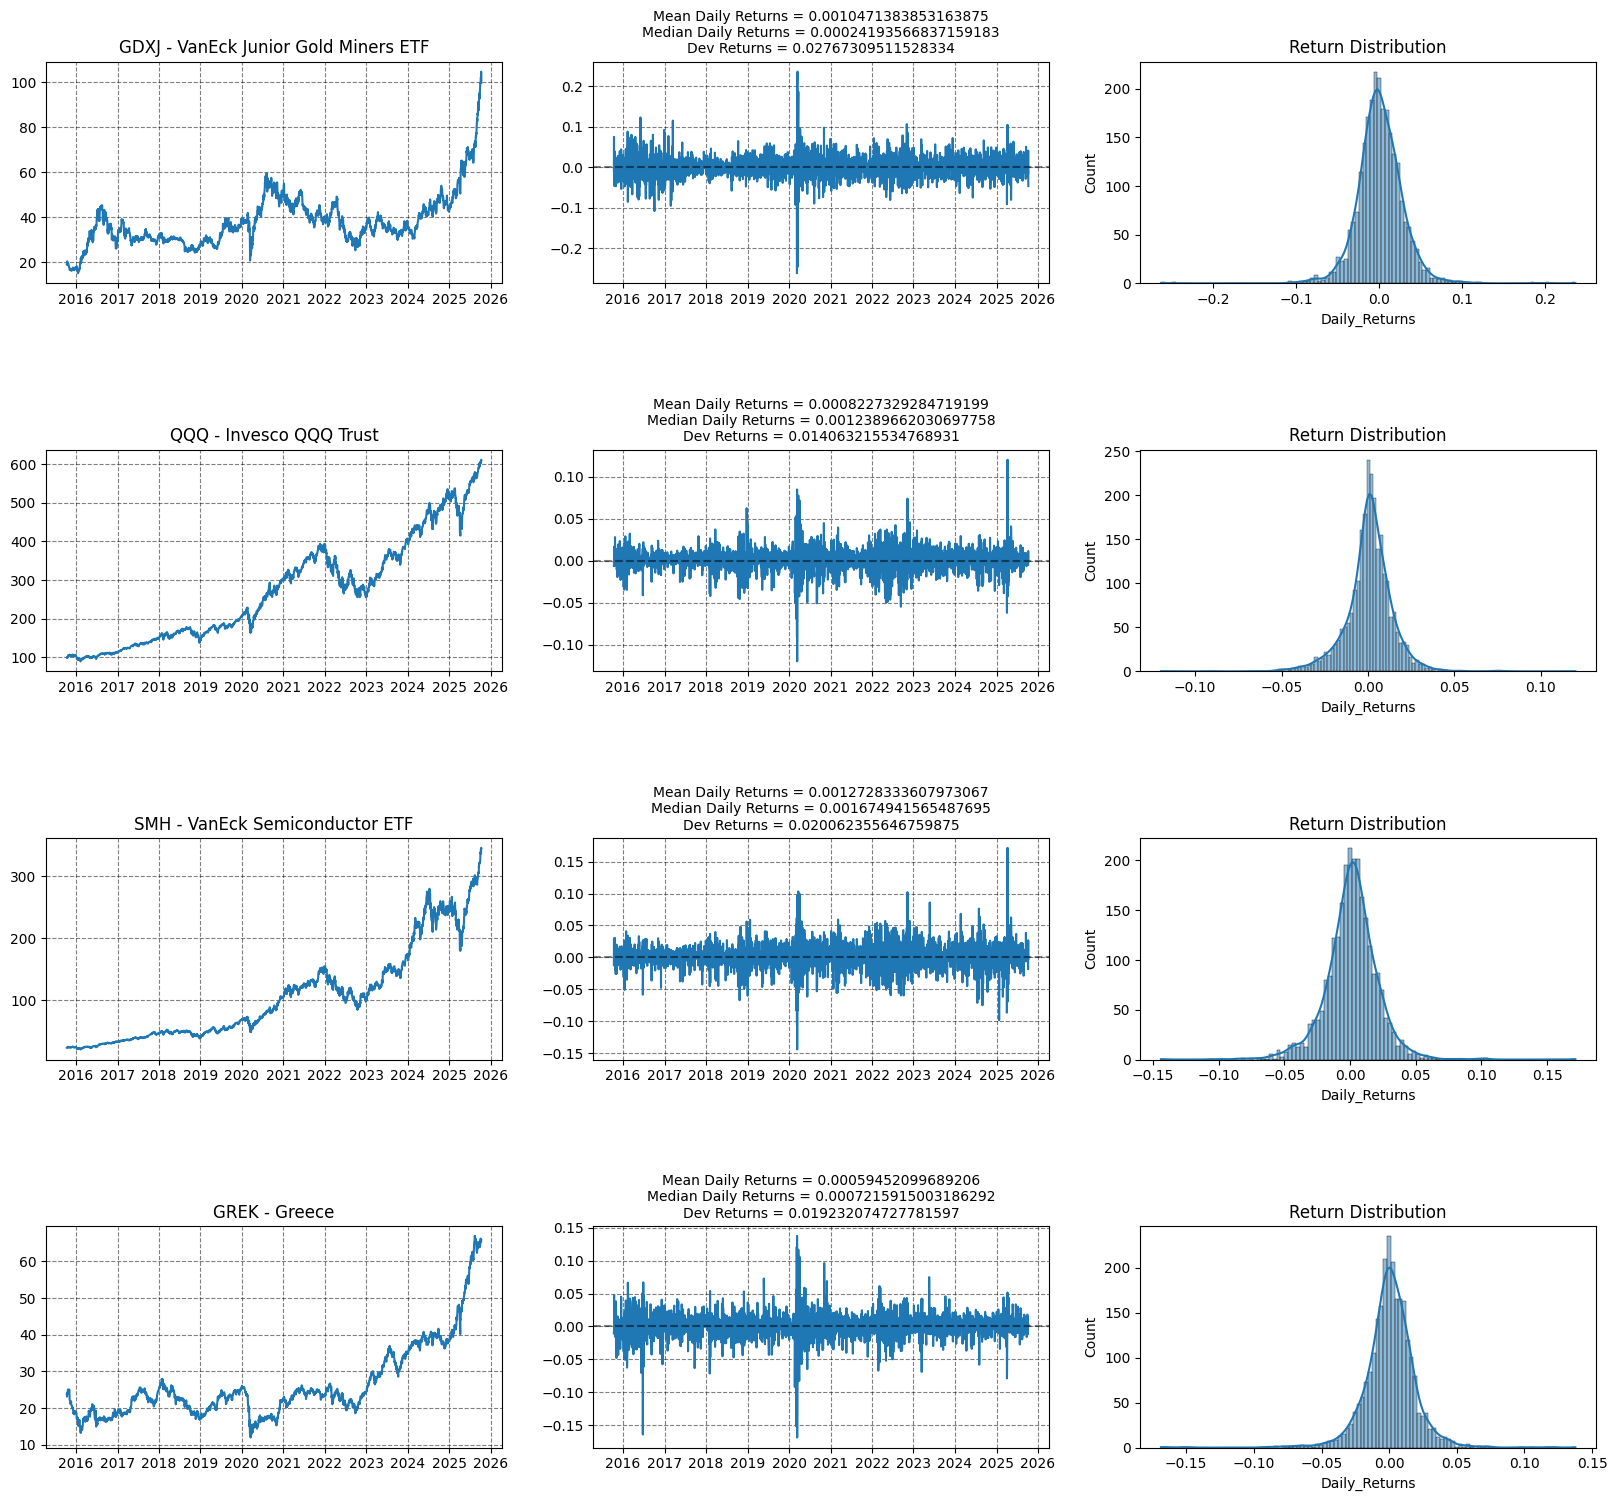

In [74]:
# Get all stock data
fig, ax = plt.subplots(4, 3, figsize=(20, 18))
stock_data = pd.DataFrame() # Must loop through to identify which stock is which
for i, stock in enumerate(invesments):
    data = yf.download(stock, start=sim_start_date, end=today)
    data.columns = data.columns.values
    data.columns = ["Close", "High", "Low", "Open", "Volume"]
    data["Stock"] = stock
    data["(t+1)"] = data["Close"].shift(-1)
    data["Daily_Returns"] = (data["(t+1)"] - data["Close"])/data["Close"]
    ax[i,0].plot(data["Close"])
    ax[i,0].set_title(f"{stock} - {investment_names[i]}")
    ax[i,0].grid(alpha = 0.5, color = 'k', linestyle='--')

    ax[i,1].plot(data["Daily_Returns"])
    ax[i,1].set_title(f"Mean Daily Returns = {data["Daily_Returns"].mean()}\nMedian Daily Returns = {data["Daily_Returns"].median()}\nDev Returns = {data["Daily_Returns"].std()}", fontsize = 10)
    ax[i,1].grid(alpha = 0.5, color = 'k', linestyle='--')
    ax[i,1].axhline(y=0, color='k', linestyle='--', alpha = 0.5)

    sns.histplot(data["Daily_Returns"], ax=ax[i,2], kde=True)
    #shap, p = shapiro(data["Daily_Returns"])
    ax[i, 2].set_title(f"Return Distribution")

    stock_data = pd.concat([stock_data, data])

stock_data
plt.subplots_adjust(hspace=0.75)
plt.show()

In [75]:
# Add colummn shifted a year, and yearly returns
stock_data["(t+year)"] = stock_data["Close"].shift(-252)
stock_data["Yearly_Returns"] = (stock_data["(t+year)"] - stock_data["Close"])/stock_data["Close"]
stock_data["Log_Returns"] = np.log(stock_data["(t+year)"]/stock_data["Close"])
stock_data.head()

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2015-10-12,18.917860,19.604044,18.648596,19.604044,14385500,GDXJ,18.761515,-0.008264,32.642132,0.725466,0.545497
2015-10-13,18.761515,19.213181,18.613855,18.770201,6453300,GDXJ,20.168623,0.075000,33.508270,0.786011,0.579985
2015-10-14,20.168623,20.272854,19.143690,19.195805,21102000,GDXJ,20.272856,0.005168,34.251926,0.698278,0.529615
2015-10-15,20.272856,20.481317,19.638787,19.777761,8536300,GDXJ,19.577986,-0.034276,33.315796,0.643370,0.496749
2015-10-16,19.577986,20.342343,19.534555,20.194683,12008200,GDXJ,18.665970,-0.046584,33.866974,0.729850,0.548035


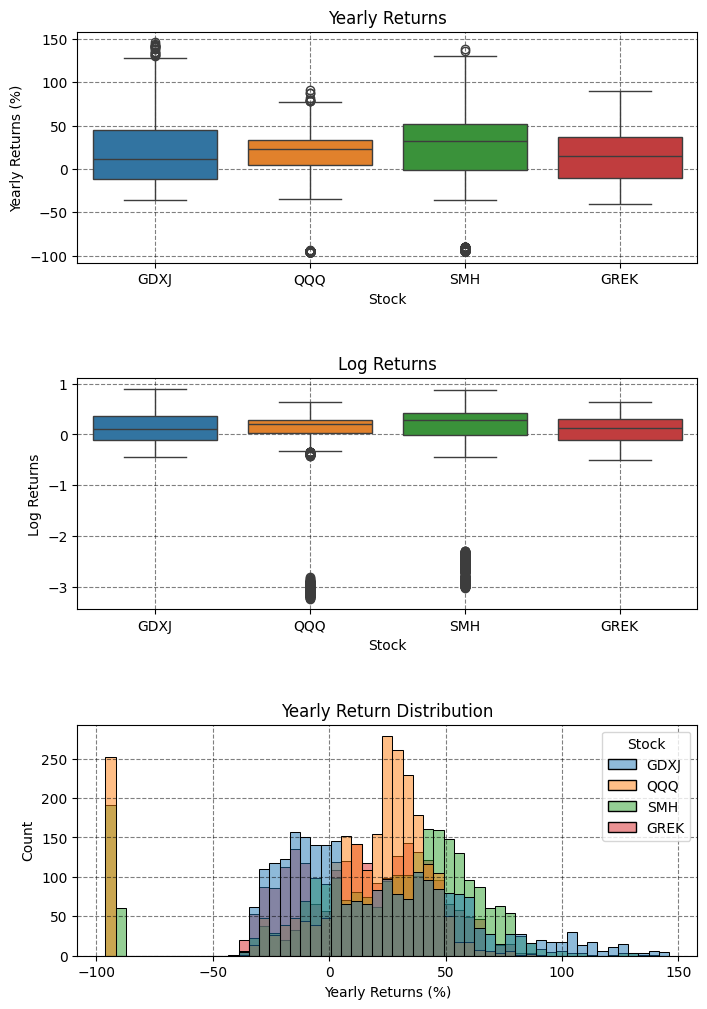

In [76]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
stock_data_reset = stock_data.reset_index()
sns.boxplot(x="Stock", y=stock_data_reset["Yearly_Returns"]*100, data=stock_data_reset, hue = "Stock", ax=ax[0])
ax[0].set_title("Yearly Returns")
ax[0].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[0].set_ylabel("Yearly Returns (%)")

sns.boxplot(x="Stock", y="Log_Returns", data=stock_data_reset, hue = "Stock", ax=ax[1])
ax[1].set_title("Log Returns")
ax[1].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[1].set_ylabel("Log Returns")


sns.histplot(data=stock_data_reset, x=stock_data_reset["Yearly_Returns"]*100, ax=ax[2], hue = "Stock")
ax[2].set_title("Yearly Return Distribution")
ax[2].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[2].set_xlabel("Yearly Returns (%)")


plt.subplots_adjust(hspace=0.5)
plt.show()

In [69]:
# Lets see how much 1000 wouldve compunded if we invested in 2015 (SIMPLE INTEREST/NO REINVESTMENT)
def calc_return(stock, amt=1000):
  subset = stock_data.query('Stock == @stock')
  pct_change_total = ((subset.Close.iloc[-1] - subset.Close.iloc[0]) / subset.Close.iloc[0])*100
  print(f"{stock} 10 year return: {round(pct_change_total, 2)}%")
  return pct_change_total * amt

def avg_yearly_return(stock):
  subset = stock_data.query('Stock == @stock')
  return round(subset["Yearly_Returns"].mean()*100, 2), round(subset["Yearly_Returns"].std()*100, 2)


print((f"$1000 invested in QQQ on {sim_start_date} compounds to {round(calc_return("QQQ"), 2)}"))
print(f"QQQ Average Yearly Return: {avg_yearly_return("QQQ")[0]}%. QQQ Standard Deviation: {avg_yearly_return("QQQ")[1]}")
print()

print((f"$1000 invested in GREK on {sim_start_date} compounds to {round(calc_return("GREK"), 2)}"))
print(f"GREK Average Yearly Return: {avg_yearly_return("GREK")[0]}%. GREK Standard Deviation: {avg_yearly_return("GREK")[1]}")
print()

print((f"$1000 invested in GDXJ on {sim_start_date} compounds to {round(calc_return("GDXJ"), 2)}"))
print(f"GDXJ Average Yearly Return: {avg_yearly_return("GDXJ")[0]}%. GDXJ Standard Deviation: {avg_yearly_return("GDXJ")[1]}")
print()

print((f"$1000 invested in SMH on {sim_start_date} compounds to {round(calc_return("SMH"), 2)}"))
print(f"SMH Average Yearly Return: {avg_yearly_return("SMH")[0]}%. SMH Standard Deviation: {avg_yearly_return("SMH")[1]}")

QQQ 10 year return: 515.93%
$1000 invested in QQQ on 2015-10-10 compounds to 515934.65
QQQ Average Yearly Return: 9.96%. QQQ Standard Deviation: 39.87

GREK 10 year return: 178.42%
$1000 invested in GREK on 2015-10-10 compounds to 178424.65
GREK Average Yearly Return: 15.15%. GREK Standard Deviation: 27.74

GDXJ 10 year return: 428.02%
$1000 invested in GDXJ on 2015-10-10 compounds to 428019.55
GDXJ Average Yearly Return: 20.12%. GDXJ Standard Deviation: 38.19

SMH 10 year return: 1374.83%
$1000 invested in SMH on 2015-10-10 compounds to 1374826.63
SMH Average Yearly Return: 20.21%. SMH Standard Deviation: 47.15


In [77]:
# Lets now do a "backtesting" simulation to see how well stocks perform over a random
# We will assume investments happen yearly
end_range_max = today - relativedelta(years=4)
date_ls = stock_data.index[stock_data.index < pd.to_datetime(end_range_max)]


def get_nearest_trading_day(target_date, valid_dates):
  valid_dates = valid_dates.sort_values()
  if target_date in valid_dates:
    return target_date

  # If date before earliest or after latest
  if target_date < valid_dates.min():
    return valid_dates.min()

  if target_date > valid_dates.max():
    return valid_dates.max()

  # Otherwise nearest before or equal
  return valid_dates[valid_dates <= target_date].max()


def plot(dates, subset):
  """Plot close with simulated dates"""
  plt.figure(figsize=(10, 6))
  plt.plot(subset.Close)

  for i, date in enumerate(dates):
    if i == 0:
      plt.axvline(x=date, color='g', linestyle='--', alpha=0.5)
    elif i == 4:
      plt.axvline(x=date, color='r', linestyle='--', alpha=0.5)
    else:
      plt.axvline(x=date, color='y', linestyle='--', alpha=0.5)

  plt.title(f"Price History for {subset.Stock.unique()[0]}")
  plt.xlabel("Date")
  plt.ylabel("Close Price")
  plt.grid(True)
  plt.show()


def compount_interest(rates, init_amount = 1000, verbose = False):
  """Perform Compound Interest Calculator that will track investments(all 4) over a certain period of time"""
  total = 0
  for i in range(4):
    if verbose:
      print(f"Investment Number {i} of 3")
    start = init_amount
    for j in range(i, 4):
      if verbose:
        print(f"---Investment {i} grows from {start}(at time period {j} to time period {j+1}) to --> {(start)*(1+rates[j])}")
      start = (start)*(1+rates[j])

    total += start
    if verbose:
      print(f"\nTotal Value: {total}")
    if verbose:
      print()

  total = np.round(total, 2)
  return total


def rand_range_single_sim(date_range, stock, should_plot=False, verbose=False):
  # Subset by stock
  subset = stock_data.query('Stock == @stock')

  start_date = pd.Timestamp(np.random.choice(date_range))
  start_trading_date = get_nearest_trading_day(start_date, subset.index)

  # --- Build list of yearly investment dates (5 years total range) ---
  dates = [start_trading_date]
  for i in range(1, 5):
      next_date = start_date + pd.DateOffset(years=i)
      next_trading_day = get_nearest_trading_day(next_date, subset.index)
      dates.append(next_trading_day)

  random_dates_df = subset[subset.index.isin(dates)]

  if verbose:
    display(random_dates_df)

  # Optinonal plot
  if should_plot:
    plot(dates, subset)


  # Perform actual single "simuation".
  # Track 1000 invested in dates[0] --> dates[4] and see how much it grows
  # Track 1000 invested in dates[1] --> dates[4] and see how much it grows
  # ....
  # Track 1000 invested in dates[3] --> dates[4] and see how much it grows
  # Sum everything
  total_value = 0

  if verbose:
    print(f"\n===== Simulating {stock} from {dates[0].date()} to {dates[-1].date()} =====")

  prices = random_dates_df["Close"].values
  pct_changes = np.diff(prices) / prices[:-1]
  if verbose:
    print(f"Prices: {prices}")
    print(f"Pct Changes: {pct_changes}")
    print()

  if verbose:
    tot = compount_interest(pct_changes, verbose=True)
  else:
    tot = compount_interest(pct_changes)

  if verbose:
    print(f"\nTotal Value: {tot}\n")

  return round(tot, 2)

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2018-07-05,164.936386,165.069922,163.133647,163.973022,31626200,QQQ,167.502151,0.015556,182.528946,0.106663,0.101349
2019-07-05,183.818237,184.154980,182.221069,182.933064,21415600,QQQ,182.528946,-0.007014,250.617767,0.363400,0.309982
2020-07-02,244.604202,246.621638,244.138645,245.409238,31956500,QQQ,250.617767,0.024585,349.327637,0.428134,0.356369
2021-07-02,349.327637,349.649055,347.028901,347.262659,32727200,QQQ,350.837433,0.004322,281.061798,-0.195421,-0.217436
2022-07-05,281.061798,281.179327,271.061663,272.589597,61829300,QQQ,282.863922,0.006412,362.473114,0.289656,0.254376


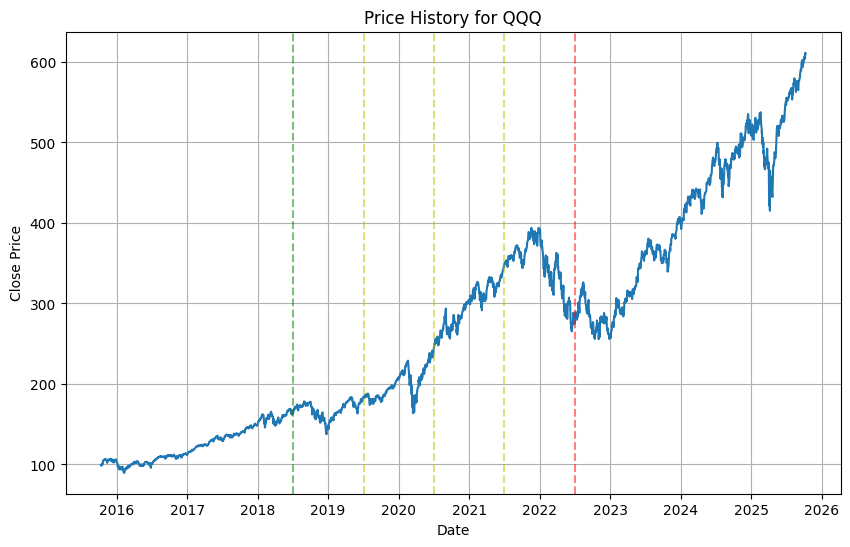


===== Simulating QQQ from 2018-07-05 to 2022-07-05 =====
Prices: [164.93638611 183.8182373  244.60420227 349.32763672 281.0617981 ]
Pct Changes: [ 0.1144796   0.33068517  0.42813424 -0.19542066]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 1114.4795981153586
---Investment 0 grows from 1114.4795981153586(at time period 1 to time period 2) to --> 1483.0214729559468
---Investment 0 grows from 1483.0214729559468(at time period 2 to time period 3) to --> 2117.953745446848
---Investment 0 grows from 2117.953745446848(at time period 3 to time period 4) to --> 1704.0618187850039

Total Value: 1704.0618187850039

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1330.6851695300759
---Investment 1 grows from 1330.6851695300759(at time period 2 to time period 3) to --> 1900.3970543995738
---Investment 1 grows from 1900.3970543995738(at time period 3 to time period 4) to --> 1529.0202006987465


,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2020-02-13,23.744129,23.846036,23.642224,23.795083,39200,GREK,23.795084,0.002146,21.148802,-0.109304,-0.115752
2021-02-12,21.148802,21.157530,20.965507,21.035334,25500,GREK,21.602678,0.021461,26.154350,0.236682,0.212432
2022-02-11,26.154350,26.733972,26.127598,26.582379,43800,GREK,25.886833,-0.010228,29.527630,0.128976,0.121311
2023-02-13,29.582685,29.601034,29.197301,29.261531,59600,GREK,29.527630,-0.001861,37.616714,0.271579,0.240259
2024-02-13,37.014091,37.390727,36.919930,37.211826,42800,GREK,37.616714,0.016281,42.290863,0.142561,0.133272


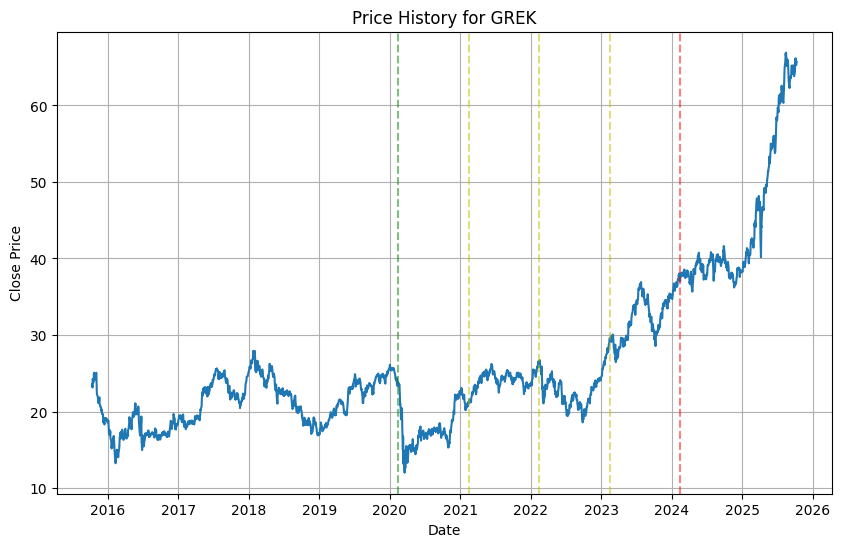


===== Simulating GREK from 2020-02-13 to 2024-02-13 =====
Prices: [23.74412918 21.1488018  26.15435028 29.58268547 37.01409149]
Pct Changes: [-0.10930396  0.23668237  0.13108088  0.25120796]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 890.6960386904336
---Investment 0 grows from 890.6960386904336(at time period 1 to time period 2) to --> 1101.5080857036226
---Investment 0 grows from 1101.5080857036226(at time period 2 to time period 3) to --> 1245.894732343666
---Investment 0 grows from 1245.894732343666(at time period 3 to time period 4) to --> 1558.8734044397347

Total Value: 1558.8734044397347

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1236.682367335034
---Investment 1 grows from 1236.682367335034(at time period 2 to time period 3) to --> 1398.7877774503988
---Investment 1 grows from 1398.7877774503988(at time period 3 to time period 4) to --> 1750.1743992616207

Total V

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2016-03-02,22.493408,22.580897,21.898485,21.985972,10166800,GDXJ,23.945728,0.064566,31.815632,0.414442,0.346735
2017-03-02,31.815632,34.100681,31.668209,33.704486,48280500,GDXJ,32.737026,0.028960,29.245964,-0.080767,-0.084216
2018-03-02,29.245964,29.808210,29.190662,29.633085,10012500,GDXJ,29.319700,0.002521,29.119856,-0.004312,-0.004321
2019-03-01,29.119856,30.129417,29.073545,29.795983,19226300,GDXJ,29.110592,-0.000318,35.440090,0.217042,0.196423
2020-03-02,35.440090,35.514507,34.379679,34.807563,26748500,GDXJ,36.937687,0.042257,44.010216,0.241820,0.216578


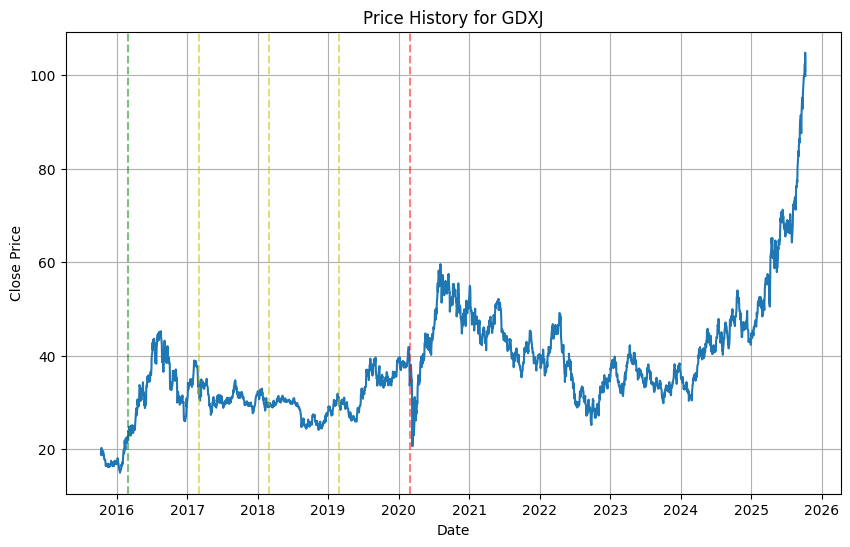


===== Simulating GDXJ from 2016-03-02 to 2020-03-02 =====
Prices: [22.4934082  31.81563187 29.24596405 29.11985588 35.44009018]
Pct Changes: [ 0.41444247 -0.08076746 -0.00431199  0.21704209]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 1414.4424703960578
---Investment 0 grows from 1414.4424703960578(at time period 1 to time period 2) to --> 1300.2015428782304
---Investment 0 grows from 1300.2015428782304(at time period 2 to time period 3) to --> 1294.5950928277598
---Investment 0 grows from 1294.5950928277598(at time period 3 to time period 4) to --> 1575.5767138267504

Total Value: 1575.5767138267504

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 919.2325386794707
---Investment 1 grows from 919.2325386794707(at time period 2 to time period 3) to --> 915.2688214072507
---Investment 1 grows from 915.2688214072507(at time period 3 to time period 4) to --> 1113.920676735317

Total 

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2017-12-27,45.949810,46.136675,45.776960,45.781632,5500000,SMH,46.117989,0.003660,41.351898,-0.100064,-0.105431
2018-12-27,41.070980,41.070980,39.661636,40.037775,17674000,SMH,41.351898,0.006840,68.750916,0.673954,0.515188
2019-12-27,68.750916,69.301850,68.605938,69.239030,3688400,SMH,68.253143,-0.007240,104.355598,0.517879,0.417314
2020-12-24,104.564850,104.584320,103.752158,103.752158,1142800,SMH,104.355598,-0.002001,154.876541,0.481153,0.392821
2021-12-27,154.876541,154.935249,151.216956,151.329489,6437400,SMH,153.350098,-0.009856,98.883057,-0.361536,-0.448690


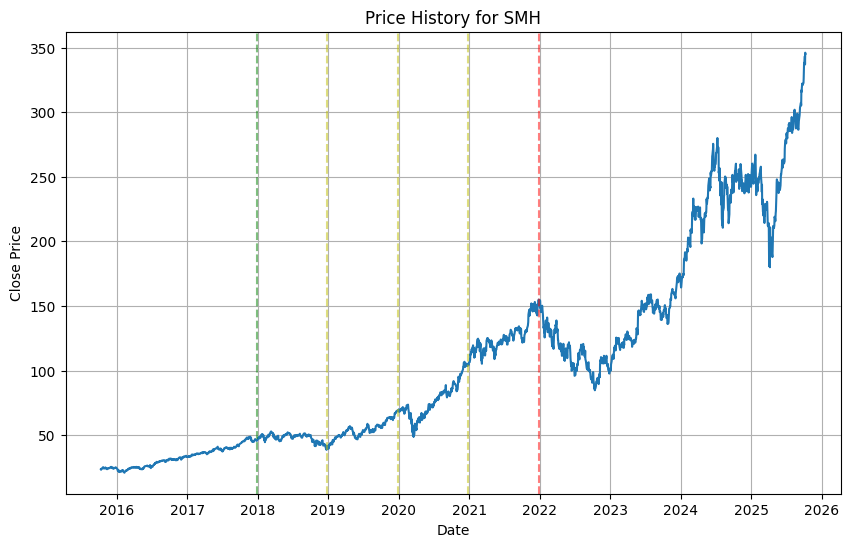


===== Simulating SMH from 2017-12-27 to 2021-12-27 =====
Prices: [ 45.94981003  41.07098007  68.75091553 104.56484985 154.87654114]
Pct Changes: [-0.10617737  0.67395361  0.52092302  0.481153  ]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 893.8226305381103
---Investment 0 grows from 893.8226305381103(at time period 1 to time period 2) to --> 1496.21762277876
---Investment 0 grows from 1496.21762277876(at time period 2 to time period 3) to --> 2275.6318206674764
---Investment 0 grows from 2275.6318206674764(at time period 3 to time period 4) to --> 3370.5588998749495

Total Value: 3370.5588998749495

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1673.9536141281053
---Investment 1 grows from 1673.9536141281053(at time period 2 to time period 3) to --> 2545.9545808293888
---Investment 1 grows from 2545.9545808293888(at time period 3 to time period 4) to --> 3770.948267270614

Tota

In [78]:
# Perform "Backtest" simulation
qqq_rand_sim = rand_range_single_sim(date_ls, "QQQ", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

grek_rand_sim = rand_range_single_sim(date_ls, "GREK", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

gdjx_rand_sim = rand_range_single_sim(date_ls, "GDXJ", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

smh_rand_sim = rand_range_single_sim(date_ls, "SMH", should_plot=True, verbose=True)
print()

Simulating GDXJ...
Simulating QQQ...
Simulating SMH...
Simulating GREK...


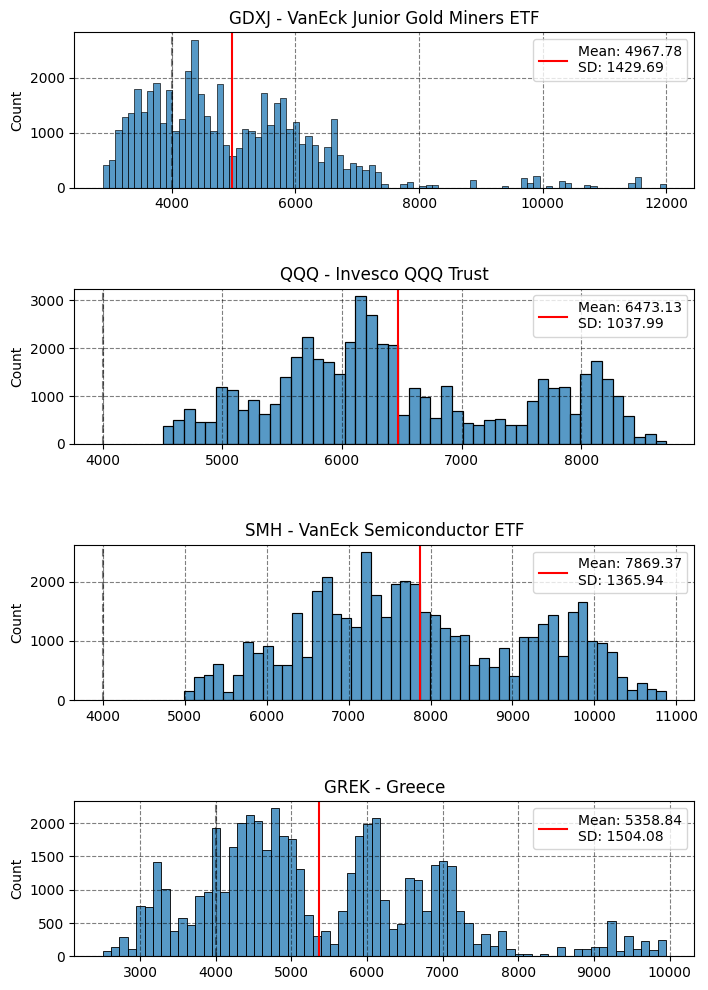

In [68]:
# Perform backtest monte carlo simulation to estimate average returns over that 10 year period for this scenario
cache = {}  # store results o

fig, ax = plt.subplots(4, 1, figsize=(8, 12))

for i, stock in enumerate(invesments):
    print(f"Simulating {stock}...")
    amts = []

    for _ in range(50_000):  # run 50000 simulations
        # pick a random start date (since rand_range_single_sim does that internally)
        # we want to key off that randomness, so we mimic it here
        start_date = pd.Timestamp(np.random.choice(date_ls))
        key = (stock, start_date)

        # check cache
        if key in cache:
            amt = cache[key]
        else:
            amt = rand_range_single_sim(date_ls, stock)
            cache[key] = amt

        amts.append(amt)

    sns.histplot(amts, ax=ax[i])
    ax[i].set_title(f"{stock} - {investment_names[i]}")
    ax[i].grid(alpha=0.5, color='k', linestyle='--')
    ax[i].axvline(x=4000, color='k', linestyle='--', alpha=0.5)
    ax[i].axvline(
        x=np.mean(amts),
        color='r',
        label=f"Mean: {np.mean(amts):.2f}\nSD: {np.std(amts):.2f}"
    )
    ax[i].legend()

plt.subplots_adjust(hspace=0.65)
plt.show()


Based off of 10 years of data, we see that to get the highest return you should invest in SMH as investing 1000 dollars a year would approximately get you $7919. However, SMH is relatively volatile, making QQQ a good choice, as you can expect good returns(10% per year), which are low risk, and can act as steady income that will compound. GDXJ and GREK can sometimes lead to high returns, but is very volatile, and we have higher chances of loosing money.